In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# read data
file_path = 'titanic.txt'
data = pd.read_csv(file_path, sep=',', index_col=None)  # Kein Index beim Einlesen
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Zielvariable
target_column = 'Survived'
y = data[target_column]

# Unabhängige Variablen
independent_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[independent_columns]


In [4]:


# Beispiel: Fehlende Werte im Alter auffüllen (z. B. mit Median)
X['Age'] = X['Age'].fillna(X['Age'].mean())



C:\Users\lucag\AppData\Local\Temp\ipykernel_8920\1212669284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].mean())


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocessor für kategorische und numerische Features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Sex', 'Embarked']),  # Kategorisch
        ('num', 'passthrough', ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])  # Numerisch
    ])


In [6]:
from sklearn.model_selection import train_test_split

# Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")


Trainingsdaten: (712, 7), Testdaten: (179, 7)


In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the dummy model (e.g., always predict the majority class)
dummy_model = DummyClassifier(strategy="most_frequent")  # Options: "most_frequent", "stratified", "uniform", etc.

# Fit the dummy model on the training data
dummy_model.fit(X_train, y_train)

# Predict on the test data
y_dummy_pred = dummy_model.predict(X_test)

# Evaluate the dummy model
print("Dummy Model Accuracy:", accuracy_score(y_test, y_dummy_pred))
print("Dummy Model Confusion Matrix:")
print(confusion_matrix(y_test, y_dummy_pred))
print("Dummy Model Classification Report:")
print(classification_report(y_test, y_dummy_pred))


Dummy Model Accuracy: 0.5865921787709497
Dummy Model Confusion Matrix:
[[105   0]
 [ 74   0]]
Dummy Model Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179



c:\Users\lucag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lucag\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline mit Preprocessing und Modell
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Training
pipeline.fit(X_train, y_train)

# Vorhersagen
y_pred = pipeline.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Genauigkeit
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))


Genauigkeit: 0.81
Confusion Matrix:
[[90 15]
 [19 55]]
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



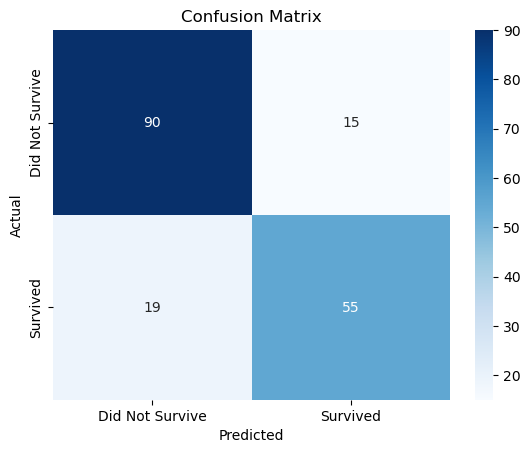

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the target variable and features
target_column = 'Survived'
y = data[target_column]
independent_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[independent_columns]

# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# One-Hot Encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Sex', 'Embarked']),
        ('num', 'passthrough', ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

# Add an intercept (constant term)
X_preprocessed = sm.add_constant(X_preprocessed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build the GLM model
glm_model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Print the summary of the GLM model
print(glm_results.summary())

# Make predictions
y_pred_prob = glm_results.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.10
Date:                Fri, 06 Dec 2024   Deviance:                       638.21
Time:                        10:43:04   Pearson chi2:                     712.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3483
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7652      0.615      7.743      0.0

C:\Users\lucag\AppData\Local\Temp\ipykernel_8920\3556156507.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
C:\Users\lucag\AppData\Local\Temp\ipykernel_8920\3556156507.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].median(), inplace=True)
C:\Users\lucag\AppDat

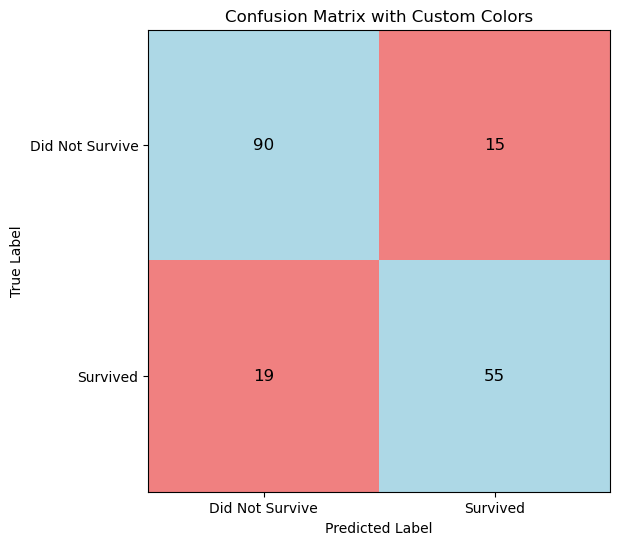

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a custom colormap: one color for TP+TN, another for FP+FN
colors = ['lightblue', 'lightcoral']
custom_cmap = ListedColormap(colors)

# Define a matrix for coloring based on TP, TN, FP, FN
colored_cm = np.zeros_like(cm, dtype=int)
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j:  # True Positives (TP) or True Negatives (TN)
            colored_cm[i, j] = 0
        else:  # False Positives (FP) or False Negatives (FN)
            colored_cm[i, j] = 1

# Plot the confusion matrix with custom colors
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(colored_cm, cmap=custom_cmap)

# Add text annotations for each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text_color = 'black'  # Ensures good contrast
        ax.text(j, i, cm[i, j], ha='center', va='center', color=text_color, fontsize=12)

# Add axis labels and titles
ax.set_xticks(range(len(['Did Not Survive', 'Survived'])))
ax.set_yticks(range(len(['Did Not Survive', 'Survived'])))
ax.set_xticklabels(['Did Not Survive', 'Survived'])
ax.set_yticklabels(['Did Not Survive', 'Survived'])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix with Custom Colors')

# Display the plot
plt.show()


In [13]:
from sklearn.tree import DecisionTreeClassifier

# initializing the model
tree_model = DecisionTreeClassifier()

# fitting the model to the train data
tree_model.fit(X=X_train, y=y_train)

y_predicted = tree_model.predict(X_train)

In [14]:
# Predicting on the test data
y_predicted = tree_model.predict(X_test)


Confusion Matrix:
[[84 21]
 [19 55]]


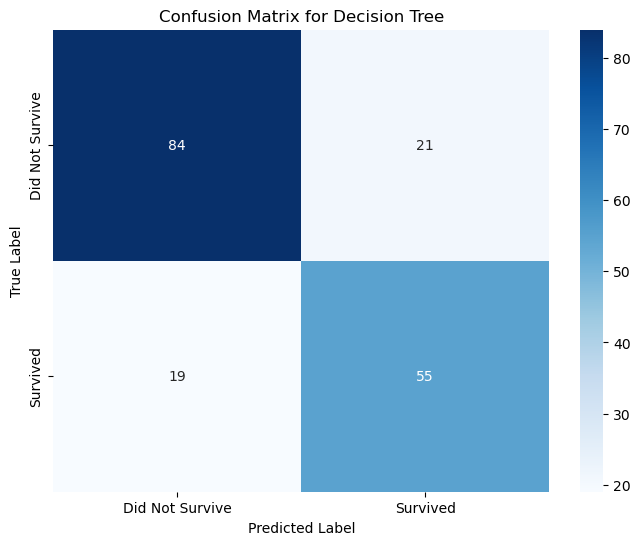

Accuracy: 0.776536312849162
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Print confusion matrix as text
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_predicted))
print("Classification Report:")
print(classification_report(y_test, y_predicted))
